<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/MOBILENET%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

# Define data directory
data_dir = '/content/drive/MyDrive/newmodidata/Y2022Ankle'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data preprocessing
image_size = (224, 224)
batch_size = 16

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load MobileNetV2 model (pre-trained on ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base_model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom classifier with L2 regularization
x = base_model.output

# Add CNN layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Add 'same' padding
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Add 'same' padding
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)



x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # Apply L2 regularization
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 143 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
8/8 [==============================] - 14s 1s/step - loss: 0.7892 - accuracy: 0.5984 - val_loss: 0.8243 - val_accuracy: 0.5938
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.7791 - accuracy: 0.6142 - val_loss: 0.7324 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.7655 - accuracy: 0.7087 - val_loss: 0.8364 - val_accuracy: 0.5312
Epoch 4/10
8/8 [==============================] - 8s 908ms/step - loss: 0.6588 - accuracy: 0.7402 - val_loss: 0.8113 - val_accuracy: 0.5625
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.6434 - accuracy: 0.7323 - val_loss: 0.7152 - val_accuracy: 0.7188
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.6371 - accuracy: 0.7559 - val_loss: 0.8612 - val_accuracy: 0.5312
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.6204 - accuracy: 0.7480 - val_loss: 0.7406 - val_accuracy: 0.6250
Epoch 8/10
8/8 [=====================

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Evaluate the model
test_loss, train_acc = model.evaluate(validation_generator)
print(f'Train accuracy: {train_acc}')

Epoch 1/10
8/8 [==============================] - 9s 1s/step - loss: 0.5158 - accuracy: 0.8189 - val_loss: 0.7450 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.5443 - accuracy: 0.7717 - val_loss: 0.7270 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.4913 - accuracy: 0.8203 - val_loss: 0.7710 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.5380 - accuracy: 0.8189 - val_loss: 1.0206 - val_accuracy: 0.4688
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.4800 - accuracy: 0.8031 - val_loss: 0.6359 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.4510 - accuracy: 0.8203 - val_loss: 0.6392 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.4893 - accuracy: 0.8425 - val_loss: 0.8136 - val_accuracy: 0.5312
Epoch 8/10
8/8 [========================

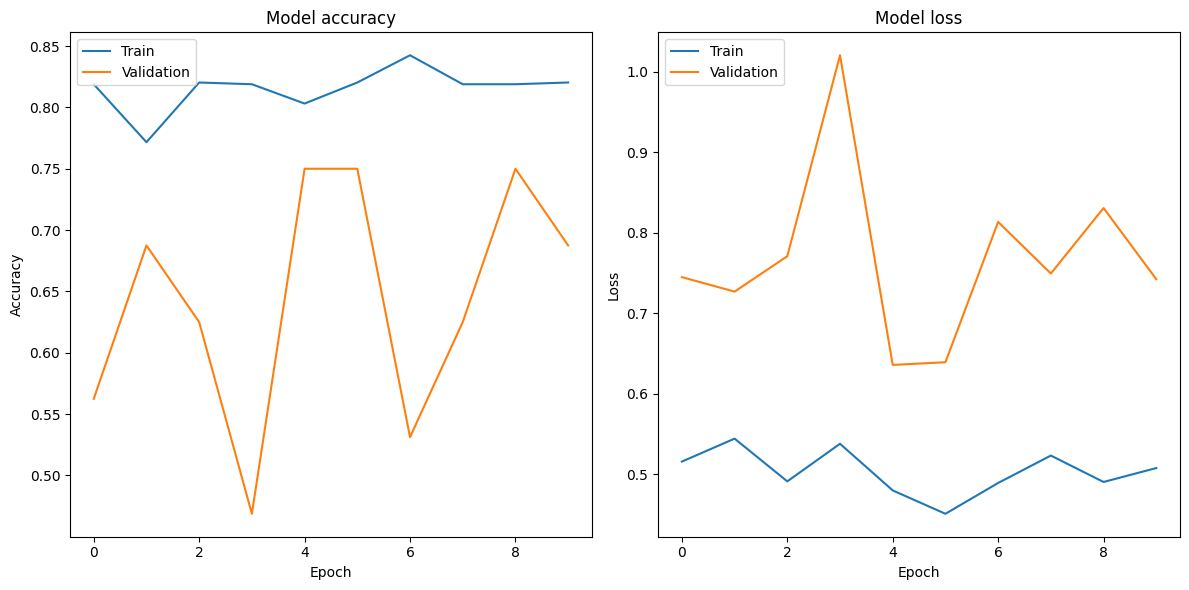

3/3 [==============================] - 2s 290ms/step
Validation Accuracy: 65.71%


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code)

# Plot learning curve
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Generate learning curve
plot_learning_curve(history)

# Obtain true labels for the validation data
num_val_samples = validation_generator.samples
num_classes = len(validation_generator.class_indices)
val_labels = np.zeros((num_val_samples, num_classes))
validation_generator.reset()
for i in range(num_val_samples // batch_size + 1):
    x, y = next(validation_generator)
    val_labels[i * batch_size:(i + 1) * batch_size] = y

# Get predicted labels for the validation data
val_pred = model.predict(validation_generator)
val_pred_labels = np.argmax(val_pred, axis=1)

# Calculate validation accuracy
val_accuracy = accuracy_score(np.argmax(val_labels, axis=1), val_pred_labels)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels for the training data
training_predictions = model.predict(train_generator)
true_labels_train = train_generator.classes
predicted_labels_train = np.argmax(training_predictions, axis=1)

# Define class names (replace with your actual class names)
class_names = ['ill', 'normal']

# Generate the classification report for training data
train_report = classification_report(true_labels_train, predicted_labels_train, target_names=class_names)
print("Training Data Classification Report:")
print(train_report)

# Generate the confusion matrix for training data
train_conf_matrix = confusion_matrix(true_labels_train, predicted_labels_train)
print("Training Data Confusion Matrix:")
print(train_conf_matrix)




9/9 [==============================] - 7s 778ms/step
Training Data Classification Report:
              precision    recall  f1-score   support

         ill       0.40      0.34      0.37        58
      normal       0.59      0.65      0.62        85

    accuracy                           0.52       143
   macro avg       0.50      0.50      0.49       143
weighted avg       0.51      0.52      0.52       143

Training Data Confusion Matrix:
[[20 38]
 [30 55]]


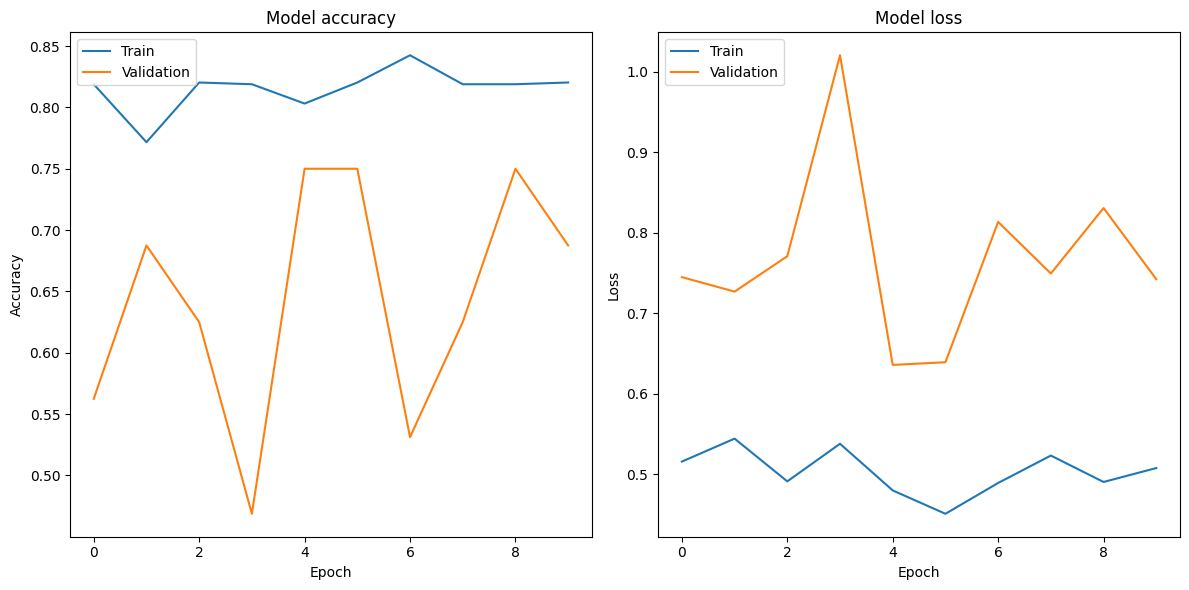

3/3 [==============================] - 1s 275ms/step
Validation Accuracy: 74.29%
9/9 [==============================] - 6s 617ms/step


In [ ]:
# ... (Previous code)

# Generate learning curve
plot_learning_curve(history)

# Obtain true labels for the validation data
num_val_samples = validation_generator.samples
num_classes = len(validation_generator.class_indices)
val_labels = np.zeros((num_val_samples, num_classes))
validation_generator.reset()
for i in range(num_val_samples // batch_size + 1):
    x, y = next(validation_generator)
    val_labels[i * batch_size:(i + 1) * batch_size] = y

# Get predicted labels for the validation data
val_pred = model.predict(validation_generator)
val_pred_labels = np.argmax(val_pred, axis=1)

# Calculate validation accuracy
val_accuracy = accuracy_score(np.argmax(val_labels, axis=1), val_pred_labels)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Obtain true labels for the training data
num_train_samples = train_generator.samples
num_classes = len(train_generator.class_indices)
train_labels = np.zeros((num_train_samples, num_classes))
train_generator.reset()
for i in range(num_train_samples // batch_size + 1):
    x, y = next(train_generator)
    train_labels[i * batch_size:(i + 1) * batch_size] = y

# Get predicted labels for the training data
train_pred = model.predict(train_generator)
train_pred_labels = np.argmax(train_pred, axis=1)

# Calculate training accuracy
train_accuracy = accuracy_score(np.argmax(train_labels, axis=1), train_pred_labels)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Create and display confusion matrix for training accuracy
cm_train = confusion_matrix(np.argmax(train_labels, axis=1), train_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Training Accuracy')
plt.show()

# Create and display confusion matrix for validation accuracy
cm_val = confusion_matrix(np.argmax(val_labels, axis=1), val_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Validation Accuracy')
plt.show()
